In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [6]:
data=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/MULTI LINEAR REGRESSION/ToyotaCorolla.csv",encoding='Latin-1')

In [10]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [48]:
col=['Id','Price','Age_08_04','KM','HP','cc','Weight','Fuel_Type']

In [49]:
car=data[col]

In [50]:
car

,Id,Price,Age_08_04,KM,HP,cc,Weight,Fuel_Type
0,1,13500,23,46986,90,2000,1165,Diesel
1,2,13750,23,72937,90,2000,1165,Diesel
2,3,13950,24,41711,90,2000,1165,Diesel
3,4,14950,26,48000,90,2000,1165,Diesel
4,5,13750,30,38500,90,2000,1170,Diesel
...,...,...,...,...,...,...,...,...
1431,1438,7500,69,20544,86,1300,1025,Petrol
1432,1439,10845,72,19000,86,1300,1015,Petrol
1433,1440,8500,71,17016,86,1300,1015,Petrol
1434,1441,7250,70,16916,86,1300,1015,Petrol


In [51]:
label_encoder=preprocessing.LabelEncoder()

In [52]:
car["Fuel_Type"]=label_encoder.fit_transform(data['Fuel_Type'])

C:\Users\Anith\AppData\Local\Temp\ipykernel_4884\1353422124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["Fuel_Type"]=label_encoder.fit_transform(data['Fuel_Type'])


In [53]:
car

,Id,Price,Age_08_04,KM,HP,cc,Weight,Fuel_Type
0,1,13500,23,46986,90,2000,1165,1
1,2,13750,23,72937,90,2000,1165,1
2,3,13950,24,41711,90,2000,1165,1
3,4,14950,26,48000,90,2000,1165,1
4,5,13750,30,38500,90,2000,1170,1
...,...,...,...,...,...,...,...,...
1431,1438,7500,69,20544,86,1300,1025,2
1432,1439,10845,72,19000,86,1300,1015,2
1433,1440,8500,71,17016,86,1300,1015,2
1434,1441,7250,70,16916,86,1300,1015,2


In [54]:
car.corr()

,Id,Price,Age_08_04,KM,HP,cc,Weight,Fuel_Type
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.117704,-0.414500,0.154353
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.581198,-0.022157
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.470253,0.080261
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.028598,-0.420586
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.089614,0.409476
cc,-0.117704,0.126389,-0.098084,0.102683,0.035856,1.000000,0.335637,-0.277239
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.335637,1.000000,-0.505303
Fuel_Type,0.154353,-0.022157,0.080261,-0.420586,0.409476,-0.277239,-0.505303,1.000000


In [55]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1436 non-null   int64
 1   Price      1436 non-null   int64
 2   Age_08_04  1436 non-null   int64
 3   KM         1436 non-null   int64
 4   HP         1436 non-null   int64
 5   cc         1436 non-null   int64
 6   Weight     1436 non-null   int64
 7   Fuel_Type  1436 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 84.3 KB


In [56]:
car.isna().sum()

Id           0
Price        0
Age_08_04    0
KM           0
HP           0
cc           0
Weight       0
Fuel_Type    0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


'\nplt.figure(figsize=(10,6))\nplt.subplot(1,2,2)\nplt.scatter(car["Quarterly_Tax"],car["Weight"],color="red")\nplt.legend(loc=\'upper right\')\n'

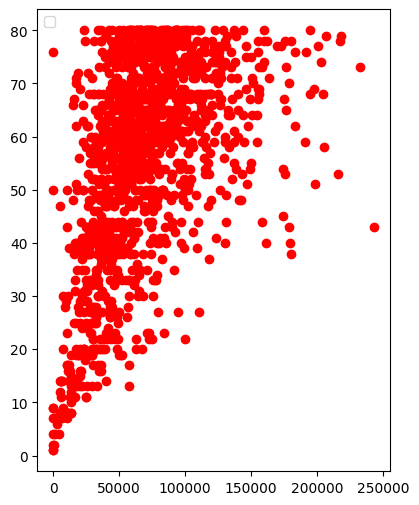

In [57]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(car["KM"],car["Age_08_04"],color="red")
plt.legend(loc='upper left')
'''
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.scatter(car["Quarterly_Tax"],car["Weight"],color="red")
plt.legend(loc='upper right')
'''

<Axes: >

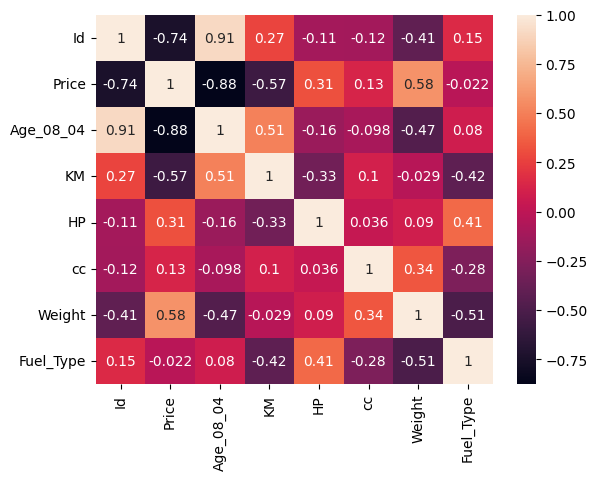

In [58]:
sns.heatmap(car.corr(),annot=True)

C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


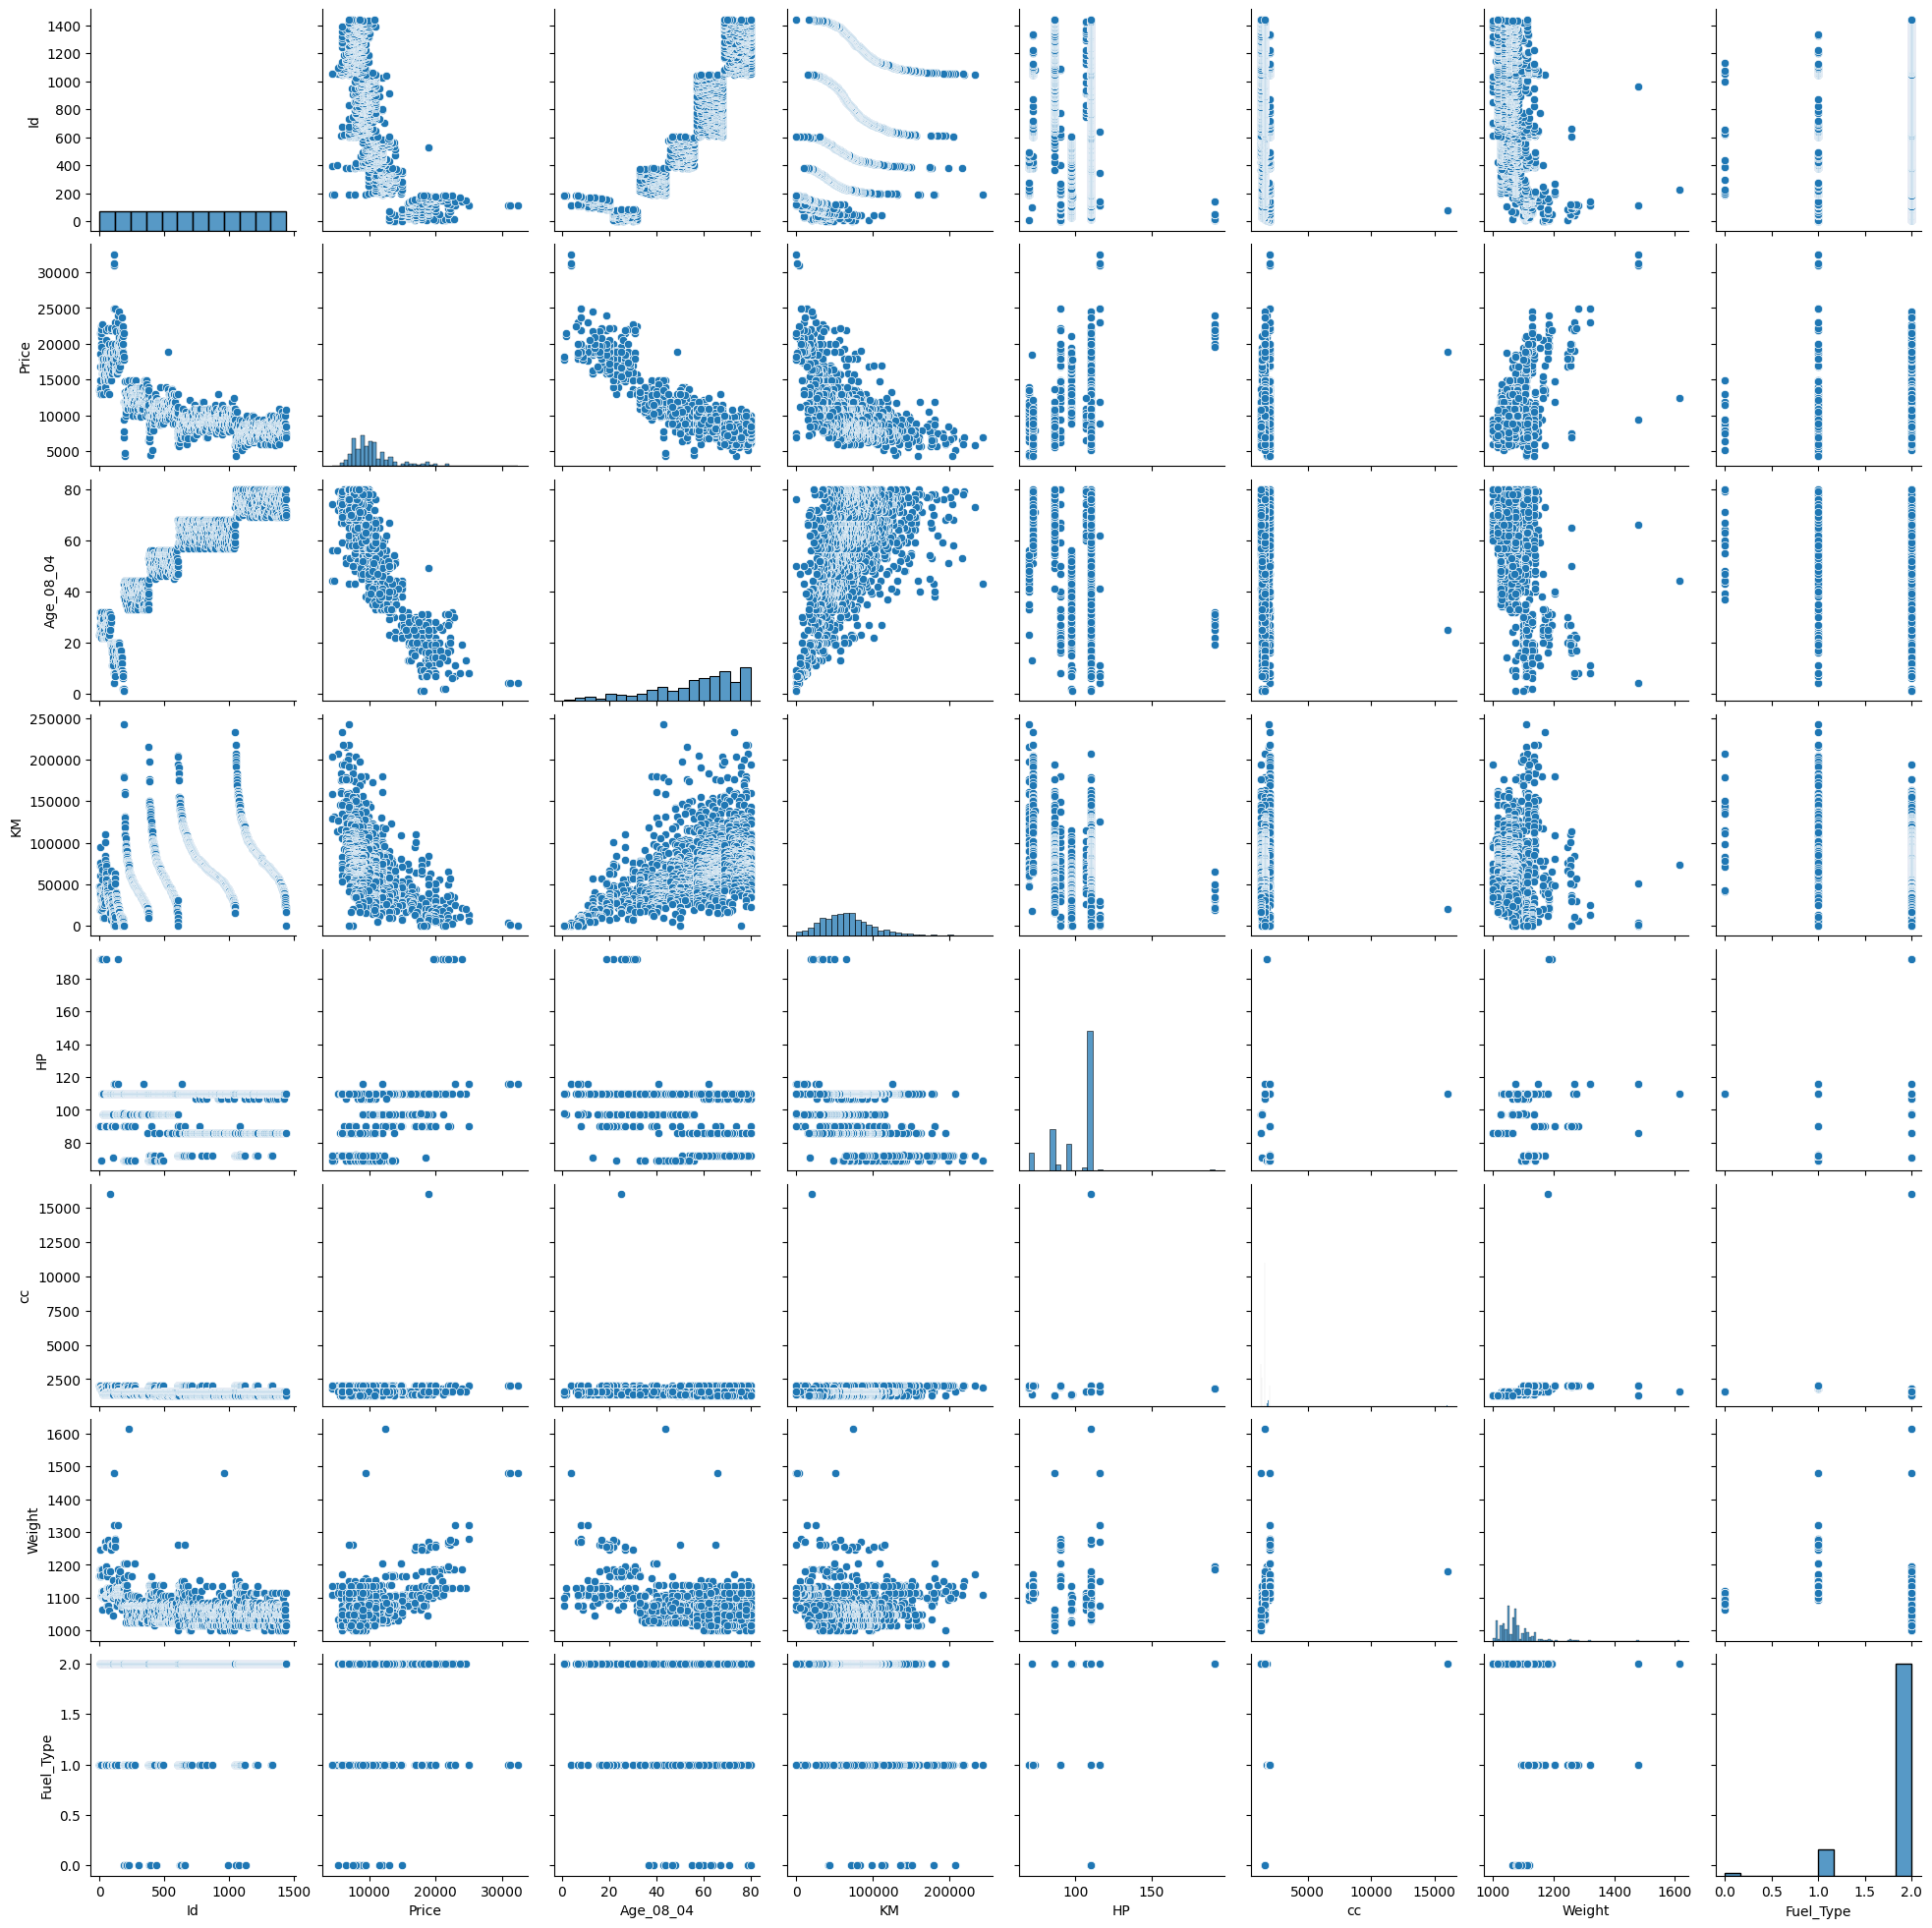

In [59]:
sns.pairplot(car)

In [60]:
import statsmodels.formula.api as smf

In [61]:
car.columns

Index(['Id', 'Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_Type'], dtype='object')

In [65]:
model=smf.ols("Price~Age_08_04+KM+HP+cc+Weight+Fuel_Type",data=car).fit()
model.rsquared

0.8635180634074702

In [66]:
r_age=smf.ols("Age_08_04~KM+HP+cc+Weight+Fuel_Type",data=car).fit().rsquared
v_age=1/(1-r_age)

In [67]:
r_km=smf.ols("KM~Age_08_04+HP+cc+Weight+Fuel_Type",data=car).fit().rsquared
v_km=1/(1-r_km)

In [68]:
r_hp=smf.ols("HP~Age_08_04+KM+cc+Weight+Fuel_Type",data=car).fit().rsquared
v_hp=1/(1-r_hp)

In [69]:
r_fuel=smf.ols("Fuel_Type~Age_08_04+KM+HP+cc+Weight",data=car).fit().rsquared
v_fuel=1/(1-r_fuel)

In [70]:
r_weight=smf.ols("Weight~Age_08_04+KM+HP+cc+Fuel_Type",data=car).fit().rsquared
v_weight=1/(1-r_weight)

In [71]:
r_cc=smf.ols("cc~KM+Age_08_04+Weight+Fuel_Type+HP",data=car).fit().rsquared
v_cc=1/(1-r_cc)

In [72]:
d1={"feature":['age','km','hp','fuel','weight','cc'],"VIF":[v_age,v_km,v_hp,v_fuel,v_weight,v_cc]}

In [74]:
VIF=pd.DataFrame(d1)
VIF

,feature,VIF
0,age,1.886590
1,km,1.906979
2,hp,1.425642
3,fuel,2.290302
4,weight,2.069829
5,cc,1.162449


In [75]:
car.columns

Index(['Id', 'Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_Type'], dtype='object')

In [78]:
print(smf.ols("Price~Age_08_04+KM+HP+cc+Weight",data=car).fit().rsquared)#fuel_Type


0.861870305617451


In [83]:
md=smf.ols("Price~np.log(Age_08_04)+pow(Age_08_04,2)+KM+HP+cc+Weight",data=car).fit().rsquared
print(md)
md1=smf.ols("Price~np.log(cc)+pow(cc,2)+HP+KM+Age_08_04+Weight",data=car).fit().rsquared
print(md1)
md3=smf.ols("Price~np.log(HP)+pow(HP,2)+Age_08_04+KM+cc+Weight",data=car).fit().rsquared
print(md3)

0.8679199524701373
0.8659235397857259
0.8641761076285802


In [111]:
model=smf.ols("Price~np.log(Age_08_04)+pow(Age_08_04,2)+KM+HP+cc+Weight",data=car).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1565.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:47:42   Log-Likelihood:                -12353.
No. Observations:                1436   AIC:                         2.472e+04
Df Residuals:                    1429   BIC:                         2.476e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4925.1022   1146.584      4.295      0.000    2675.934    7174.270
np.log(Age_08_04) -3264.8808    140.566    -23.227      0.000   -3540.619   -2989.142
pow(Age_08_04, 2)    -0.4177      0.036    -11.615      0.000      -0.488      -0.347
KM                   -0.0184      0.001    -15.419      0.000      -0.021      -0.016
HP                   31.6641      2.489     12.721      0.000      26.781      36.547
cc                   -0.0153      0.088     -0.173      0.863      -0.188       0.158
Weight               16.9414      0.846     20.014      0.000      15.281      18.602
==============================================================================
Omnibus:                      273.945   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2175.131
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                       8.885   Cond. No.                     2.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  3.,   1.,   1.,   0.,   2.,   3.,   3.,   7.,  44., 139., 303.,
        382., 309., 153.,  49.,  26.,   9.,   0.,   0.,   2.]),
 array([-8846.8991362 , -8081.11708687, -7315.33503753, -6549.5529882 ,
        -5783.77093886, -5017.98888952, -4252.20684019, -3486.42479085,
        -2720.64274152, -1954.86069218, -1189.07864284,  -423.29659351,
          342.48545583,  1108.26750516,  1874.0495545 ,  2639.83160383,
         3405.61365317,  4171.39570251,  4937.17775184,  5702.95980118,
         6468.74185051]),
 <BarContainer object of 20 artists>)

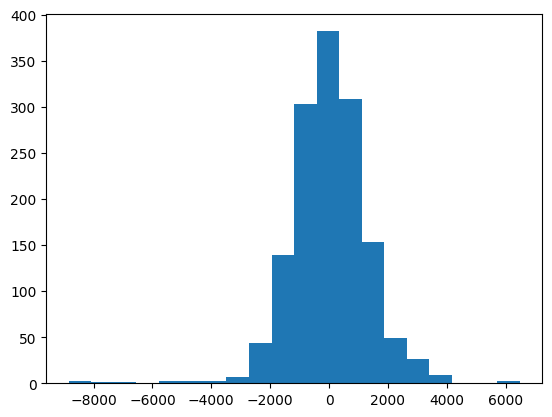

In [84]:
plt.hist(model.resid,bins=20)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a9e0ddfb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9e0e850d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9df2b51d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9e0e862d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9e0e86b50>],
 'means': []}

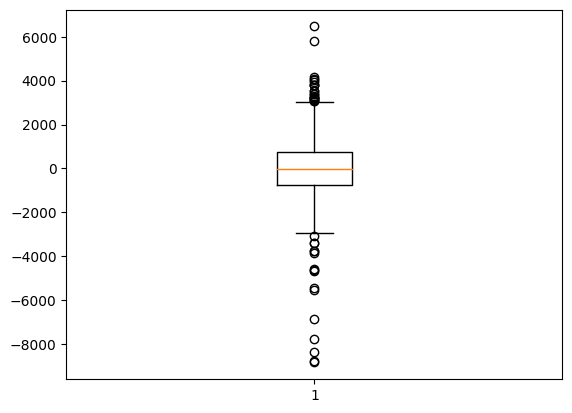

In [86]:
plt.boxplot(model.resid)

In [87]:
import statsmodels.api as sm

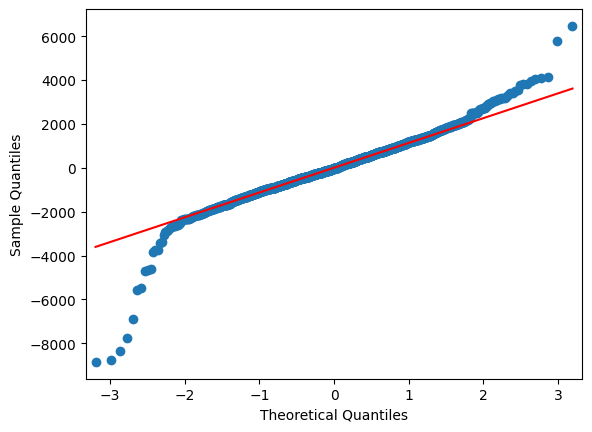

In [88]:
qplot=sm.qqplot(model.resid,line="q")
plt.show()

In [89]:
def get(v):
    return (v - v.mean())/v.std()

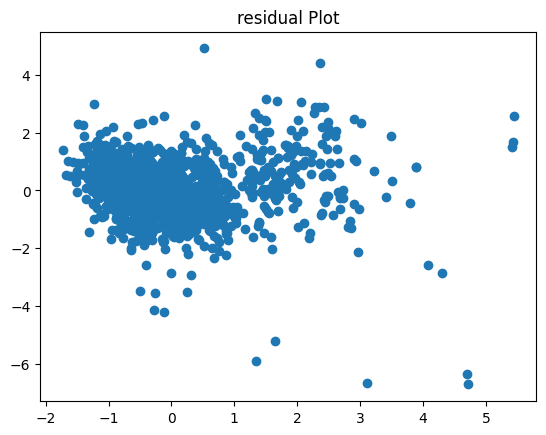

In [90]:
plt.scatter(get(model.fittedvalues),get(model.resid))
plt.title("residual Plot")
plt.show()

In [92]:
car.columns

Index(['Id', 'Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_Type'], dtype='object')

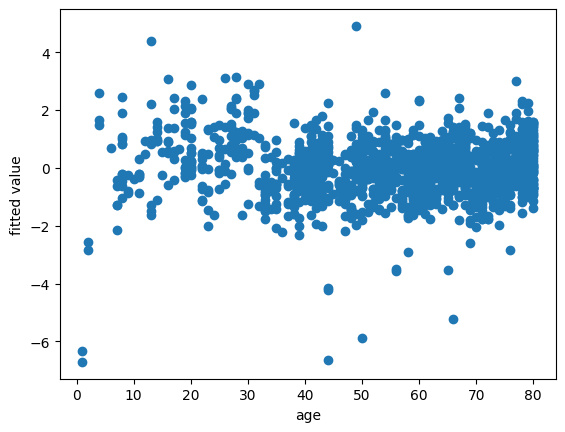

In [94]:
plt.scatter(car['Age_08_04'],get(model.resid))
plt.xlabel('age')
plt.ylabel("fitted value")
plt.show()

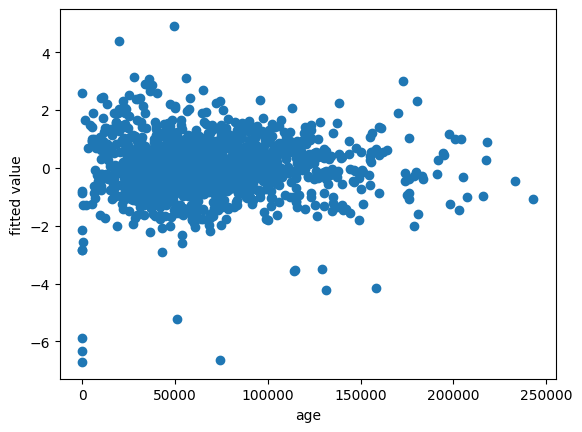

In [95]:
plt.scatter(car['KM'],get(model.resid))
plt.xlabel('km')
plt.ylabel("fitted value")
plt.show()

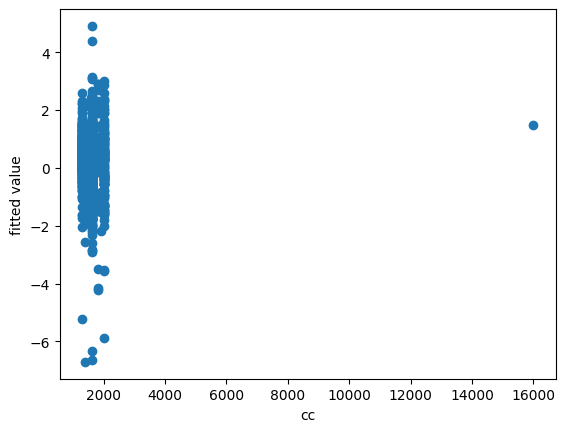

In [96]:
plt.scatter(car['cc'],get(model.resid))
plt.xlabel('cc')
plt.ylabel("fitted value")
plt.show()

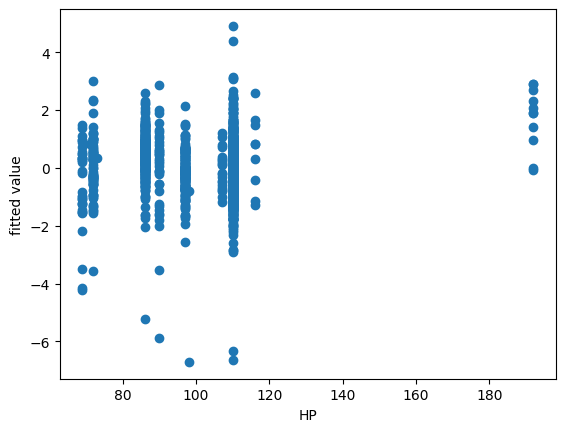

In [97]:
plt.scatter(car['HP'],get(model.resid))
plt.xlabel('HP')
plt.ylabel("fitted value")
plt.show()

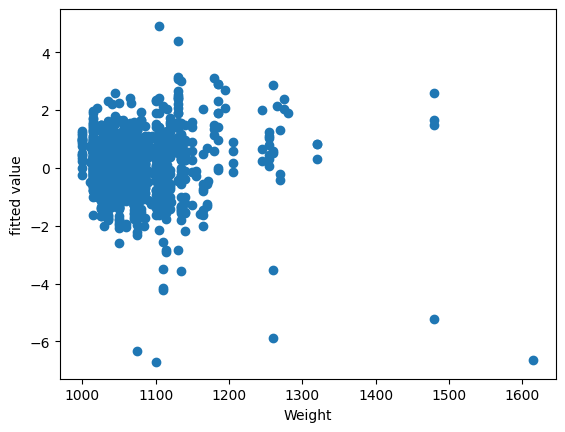

In [98]:
plt.scatter(car['Weight'],get(model.resid))
plt.xlabel('Weight')
plt.ylabel("fitted value")
plt.show()

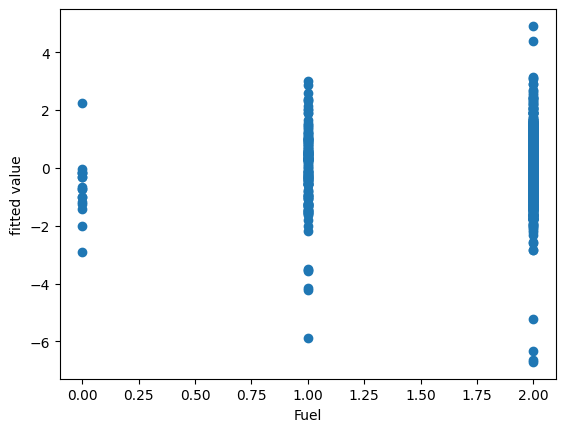

In [99]:
plt.scatter(car['Fuel_Type'],get(model.resid))
plt.xlabel('Fuel')
plt.ylabel("fitted value")
plt.show()

In [100]:
car.shape[0]

1436

In [102]:
car.shape[1]

8

In [103]:
car

,Id,Price,Age_08_04,KM,HP,cc,Weight,Fuel_Type
0,1,13500,23,46986,90,2000,1165,1
1,2,13750,23,72937,90,2000,1165,1
2,3,13950,24,41711,90,2000,1165,1
3,4,14950,26,48000,90,2000,1165,1
4,5,13750,30,38500,90,2000,1170,1
...,...,...,...,...,...,...,...,...
1431,1438,7500,69,20544,86,1300,1025,2
1432,1439,10845,72,19000,86,1300,1015,2
1433,1440,8500,71,17016,86,1300,1015,2
1434,1441,7250,70,16916,86,1300,1015,2


In [115]:
model_i=model.get_influence()


In [116]:
(c,_)=model_i.cooks_distance

In [117]:
k=car.shape[1]
n=car.shape[0]
(5*k)/n

0.027855153203342618

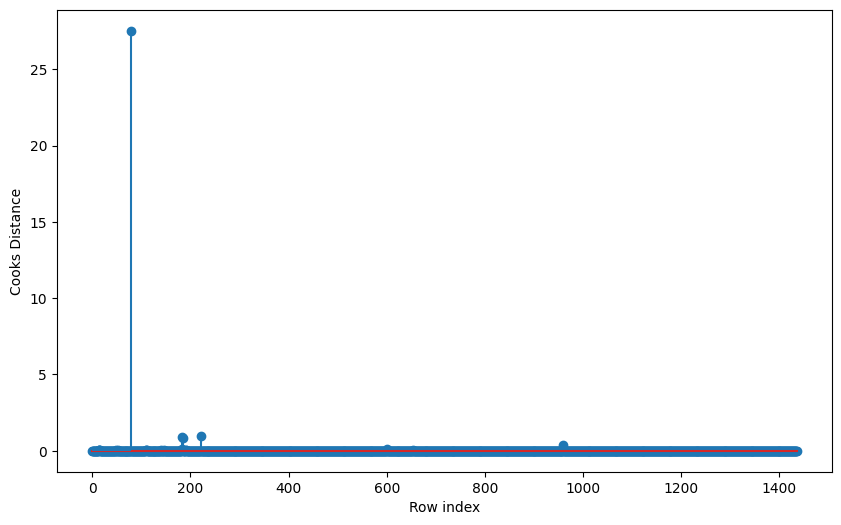

In [118]:
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(car)),np.round(c,5))
plt.hlines(y=0.027855153203342618,xmin=0,xmax=80)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [119]:
(np.argmax(c),np.max(c))

(80, 27.529279882519848)

In [120]:
np.where(c>=0.027855153203342618)

(array([ 14,  16,  49,  80, 109, 182, 183, 184, 185, 221, 601, 960],
       dtype=int64),)

In [121]:
data1=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/MULTI LINEAR REGRESSION/ToyotaCorolla.csv",encoding='Latin-1')

In [122]:
car1=car.drop(car.index[[ 14,  16,  49,  80, 109, 182, 183, 184, 185, 221, 601, 960]],axis=0).reset_index()

In [123]:
car=car1.drop(['index'],axis=1)

In [124]:
final_model=smf.ols("Price~np.log(Age_08_04)+pow(Age_08_04,2)+KM+HP+cc+Weight",data=car).fit()

In [125]:
(final_model.rsquared,final_model.aic)

(0.8901229941807618, 24162.165571880683)

In [127]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1913.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:03:28   Log-Likelihood:                -12074.
No. Observations:                1424   AIC:                         2.416e+04
Df Residuals:                    1417   BIC:                         2.420e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1296.7013   1471.575      0.881      0.378   -1589.999    4183.402
np.log(Age_08_04) -3676.2786    167.277    -21.977      0.000   -4004.416   -3348.141
pow(Age_08_04, 2)    -0.2979      0.037     -8.122      0.000      -0.370      -0.226
KM                   -0.0164      0.001    -14.383      0.000      -0.019      -0.014
HP                   28.8582      2.321     12.432      0.000      24.305      33.412
cc                   -2.1896      0.279     -7.862      0.000      -2.736      -1.643
Weight               24.7901      1.246     19.900      0.000      22.346      27.234
==============================================================================
Omnibus:                       73.126   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.348
Skew:                           0.056   Prob(JB):                     1.31e-56
Kurtosis:                       5.080   Cond. No.                     3.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

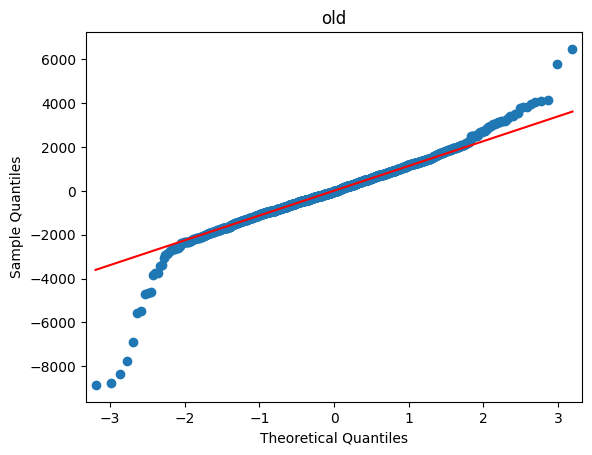

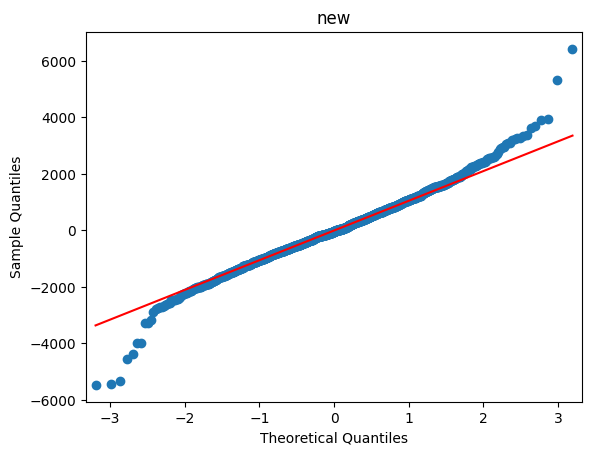

In [129]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("old")
plt.show()

qqplot=sm.qqplot(final_model.resid,line='q')
plt.title('new')
plt.show()